In [ ]:
# pip install citipy

In [1]:
# Dependencies and setup
import requests
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

# Import API keys
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Set up base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Create a dictionary and loop variable
citydict = {}
citytest = ['morgan city', 'hobart', 'kawalu', 'featdsf']
record = 1
setnum = 1

# Create a loop to call for each city
for item in cities:
    # Set up query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + item + "&units=imperial"
    # Get response into JSON
    cityresponse = requests.get(query_url)
    cityjson = cityresponse.json()
    # Log each city and account for exceptions
    try:
        # Collect lat/long, Temp (F), Humidity (%), Cloudiness (%) and wind speed (mph)
        citydict[item] = [cityjson['coord']['lat'],
                      cityjson['coord']['lon'],
                      cityjson['main']['temp_max'],
                      cityjson['main']['humidity'],
                      cityjson['clouds']['all'],
                      cityjson['wind']['speed'],
                      cityjson['sys']['country'],
                      cityjson['dt']
                     ]
        print(f"Processing record {record} of set {setnum} | {item}")
        record += 1
        # use time.sleep(60) after every set of 50 cities to avoid exceeding API call limit
        if record % 50 == 0:
            setnum += 1
            time.sleep(60)
            print("(wait - avoid API call limit)")
    # Exception if city isn't found
    except:
        print(f"{item} not found. Skipping...")

print("----------Job complete!----------")

Processing record 1 of set 1 | sao jose da coroa grande
Processing record 2 of set 1 | krasnyy kholm
Processing record 3 of set 1 | albany
Processing record 4 of set 1 | hermanus
Processing record 5 of set 1 | namatanai
Processing record 6 of set 1 | vaini
Processing record 7 of set 1 | camacha
Processing record 8 of set 1 | ushuaia
Processing record 9 of set 1 | chuy
Processing record 10 of set 1 | bluff
Processing record 11 of set 1 | mataura
Processing record 12 of set 1 | nome
Processing record 13 of set 1 | porto franco
Processing record 14 of set 1 | severo-kurilsk
Processing record 15 of set 1 | busselton
Processing record 16 of set 1 | maragogi
Processing record 17 of set 1 | new norfolk
Processing record 18 of set 1 | georgetown
grand river south east not found. Skipping...
Processing record 19 of set 1 | nikolskoye
Processing record 20 of set 1 | punta arenas
Processing record 21 of set 1 | atar
Processing record 22 of set 1 | bubaque
Processing record 23 of set 1 | dikson
Pr

Processing record 181 of set 4 | hasaki
Processing record 182 of set 4 | ngorongoro
Processing record 183 of set 4 | forestville
Processing record 184 of set 4 | waw
Processing record 185 of set 4 | groningen
hvammstangi not found. Skipping...
Processing record 186 of set 4 | ossora
Processing record 187 of set 4 | hailar
Processing record 188 of set 4 | saint-louis
Processing record 189 of set 4 | mackenzie
Processing record 190 of set 4 | boa vista
yuzhno-yeniseyskiy not found. Skipping...
mys shmidta not found. Skipping...
Processing record 191 of set 4 | kaili
Processing record 192 of set 4 | bandarbeyla
Processing record 193 of set 4 | hithadhoo
Processing record 194 of set 4 | hellvik
Processing record 195 of set 4 | san quintin
Processing record 196 of set 4 | boralday
Processing record 197 of set 4 | quelimane
Processing record 198 of set 4 | egvekinot
Processing record 199 of set 4 | fenoarivo
(wait - avoid API call limit)
Processing record 200 of set 5 | nesbyen
Processing re

Processing record 358 of set 8 | danielskuil
Processing record 359 of set 8 | lucea
Processing record 360 of set 8 | adrar
Processing record 361 of set 8 | cao bang
Processing record 362 of set 8 | san fernando
Processing record 363 of set 8 | north bend
Processing record 364 of set 8 | farafangana
Processing record 365 of set 8 | vanimo
Processing record 366 of set 8 | maxixe
Processing record 367 of set 8 | isla mujeres
Processing record 368 of set 8 | araouane
Processing record 369 of set 8 | sharjah
Processing record 370 of set 8 | radom
Processing record 371 of set 8 | birstonas
Processing record 372 of set 8 | morondava
Processing record 373 of set 8 | sangar
Processing record 374 of set 8 | koulikoro
Processing record 375 of set 8 | chipinge
Processing record 376 of set 8 | bhikangaon
Processing record 377 of set 8 | bozova
Processing record 378 of set 8 | shestakovo
Processing record 379 of set 8 | coquimbo
Processing record 380 of set 8 | ewa beach
Processing record 381 of set

Processing record 543 of set 11 | torbay
sawasawa not found. Skipping...
Processing record 544 of set 11 | mareeba
Processing record 545 of set 11 | yatou
Processing record 546 of set 11 | ola
Processing record 547 of set 11 | naze
Processing record 548 of set 11 | puerto baquerizo moreno
Processing record 549 of set 11 | saint-jacques
(wait - avoid API call limit)
Processing record 550 of set 12 | ludvika
Processing record 551 of set 12 | poum
Processing record 552 of set 12 | alta floresta
Processing record 553 of set 12 | vila do maio
Processing record 554 of set 12 | axim
Processing record 555 of set 12 | barinas
Processing record 556 of set 12 | kokopo
Processing record 557 of set 12 | baruun-urt
Processing record 558 of set 12 | osypenko
Processing record 559 of set 12 | port macquarie
Processing record 560 of set 12 | ocala
Processing record 561 of set 12 | miraflores
jabiru not found. Skipping...
Processing record 562 of set 12 | mezen
Processing record 563 of set 12 | nambucca

In [6]:
# Convert the dictionary into a dataframe
citydf = pd.DataFrame.from_dict(citydict, orient='index',
                               columns=['Lat','Lon','Max Temp', 'Humidity','Cloudiness','Wind Speed','Country','Date'])
citydf

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
sao jose da coroa grande,-8.8978,-35.1478,76.51,85,14,6.15,BR,1643255291
krasnyy kholm,58.0607,37.1203,7.21,98,100,6.62,RU,1643255404
albany,42.6001,-73.9662,8.47,64,4,2.28,US,1643255217
hermanus,-34.4187,19.2345,64.80,85,22,9.17,ZA,1643255222
namatanai,-3.6667,152.4333,84.43,73,65,5.48,PG,1643255048
...,...,...,...,...,...,...,...,...
ibaiti,-23.8486,-50.1878,66.33,94,100,1.32,BR,1643256122
kholodnyy,62.7167,147.9500,-30.41,97,83,1.12,RU,1643256266
iberia,29.9502,-91.7507,41.99,70,0,8.05,US,1643256266
teguise,29.0605,-13.5640,55.62,77,0,8.05,ES,1643256266


In [7]:
citydf.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.929378,19.303130,48.619723,75.743945,59.787197,7.226228,1.643256e+09
std,32.878415,90.834646,30.598510,19.017465,40.339650,5.634937,3.507890e+02
min,-54.800000,-179.166700,-43.330000,13.000000,0.000000,0.000000,1.643255e+09
25%,-6.232625,-57.289850,26.045000,65.000000,17.000000,3.115000,1.643255e+09
50%,26.187350,23.410800,57.435000,79.500000,75.000000,5.670000,1.643256e+09
75%,48.163100,101.914975,74.317500,92.000000,100.000000,10.347500,1.643256e+09
max,78.218600,179.316700,96.640000,100.000000,100.000000,33.780000,1.643256e+09


In [12]:
# Find cities with humidity greater than 100%

# The max humidity above says 100 - so there are no cities in our dataset with humidity > 100%.
## The below code can be uncommented and run to prove this.

# humiditydata = citydf[citydf["Humidity"] > 100].index
# len(humiditydata)

0

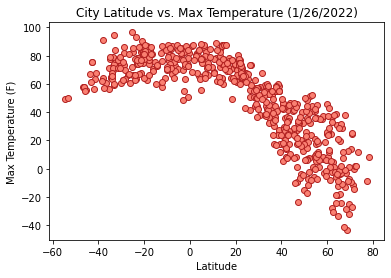

Describe the plot


In [21]:
# Plot the data
plt.scatter(citydf['Lat'], citydf['Max Temp'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
print("Describe the plot")

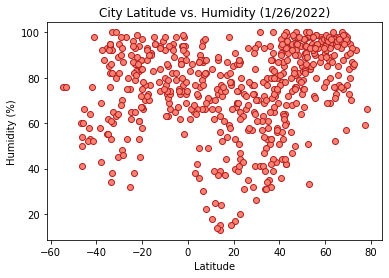

Describe the plot


In [22]:
plt.scatter(citydf['Lat'], citydf['Humidity'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("Describe the plot")

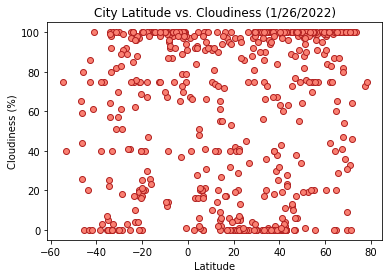

Describe the plot


In [23]:
plt.scatter(citydf['Lat'], citydf['Cloudiness'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("Describe the plot")

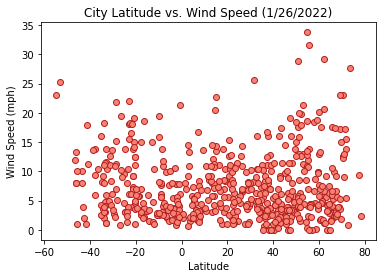

Describe the plot


In [24]:
plt.scatter(citydf['Lat'], citydf['Wind Speed'], color="salmon", edgecolor="firebrick")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("Describe the plot")

In [26]:
# Linear Regression

# Create separate dataframes for northern and southern hemisphere data
northdata = citydf[citydf['Lat'] >= 0]
southdata = citydf[citydf['Lat'] < 0]

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
sao jose da coroa grande,-8.8978,-35.1478,76.51,85,14,6.15,BR,1643255291
hermanus,-34.4187,19.2345,64.80,85,22,9.17,ZA,1643255222
namatanai,-3.6667,152.4333,84.43,73,65,5.48,PG,1643255048
vaini,-21.2000,-175.2000,86.16,84,20,9.22,TO,1643255264
ushuaia,-54.8000,-68.3000,49.66,76,75,23.02,AR,1643255048


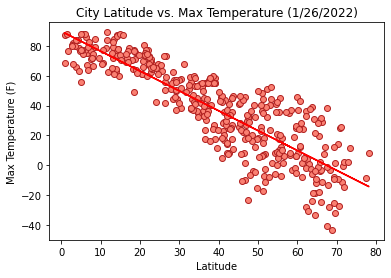

The r-value is: -0.8628060530962995


In [32]:
# Northern Hemisphere: Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Max Temp'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Max Temp'], color="salmon", edgecolor="firebrick")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

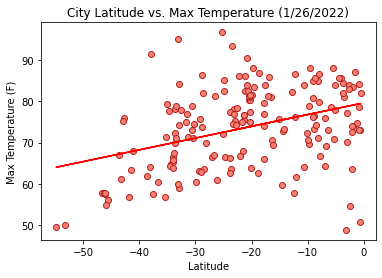

The r-value is: 0.37873307021490404


In [33]:
# Southern Hemisphere: Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Max Temp'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Max Temp'], color="salmon", edgecolor="firebrick")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Max Temperature (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

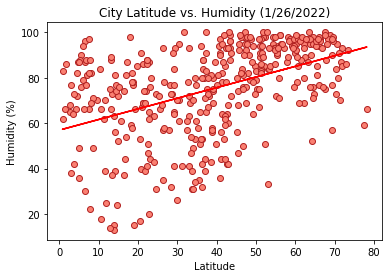

The r-value is: 0.452693545704656


In [34]:
# Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Humidity'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Humidity'], color="salmon", edgecolor="firebrick")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

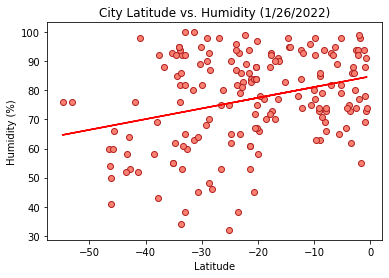

The r-value is: 0.3044330601128785


In [35]:
# Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Humidity'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Humidity'], color="salmon", edgecolor="firebrick")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Humidity (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

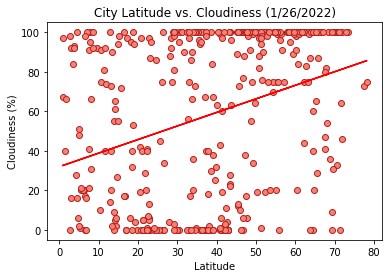

The r-value is: 0.3249042583466051


In [36]:
# Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Cloudiness'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Cloudiness'], color="salmon", edgecolor="firebrick")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

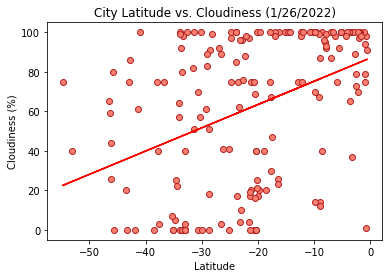

The r-value is: 0.4072391583841679


In [37]:
# Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Cloudiness'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Cloudiness'], color="salmon", edgecolor="firebrick")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Cloudiness (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

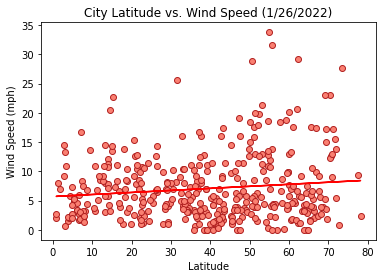

The r-value is: 0.11989827952509019


In [38]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(northdata['Lat'], northdata['Wind Speed'])
regress_values = northdata['Lat'] * slope + intercept

plt.scatter(northdata['Lat'], northdata['Wind Speed'], color="salmon", edgecolor="firebrick")
plt.plot(northdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis

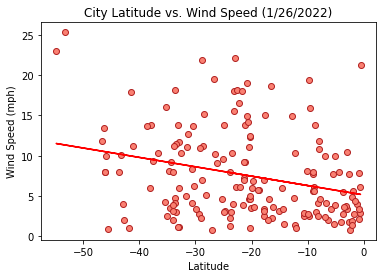

The r-value is: -0.2777706532613318


In [39]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(southdata['Lat'], southdata['Wind Speed'])
regress_values = southdata['Lat'] * slope + intercept

plt.scatter(southdata['Lat'], southdata['Wind Speed'], color="salmon", edgecolor="firebrick")
plt.plot(southdata['Lat'],regress_values,"r-")
plt.title("City Latitude vs. Wind Speed (1/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print(f"The r-value is: {rvalue}")
# Explain what linear regression is modeling - describe relationships I notice or other analysis